In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
from datetime import datetime, date
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager

import geopandas
import branca.colormap as cm
from branca.element import Template, MacroElement
import folium
from folium import plugins

In [2]:
# mac os
font_path = '/Library/Fonts/simhei.ttf'
fontP = font_manager.FontProperties(fname=font_path)
fontP.set_size(14)
fontP_12 = font_manager.FontProperties(fname=font_path)
fontP_12.set_size(12)


## Import datasets

In [3]:
sys_reactions_df = pd.read_csv('datasets/AstraZenaca - Systemic Reactions.csv')
local_reactions_df = pd.read_csv('datasets/AstraZenaca - Local Reactions.csv')

local_reactions_df = local_reactions_df.sort_values(
    ['age', 'reaction']).sort_values('dose1_pct', ascending=True).reset_index(drop=True)
sys_reactions_df = sys_reactions_df.sort_values(
    ['age', 'reaction']).sort_values('dose1_pct', ascending=True).reset_index(drop=True)


## Visu

In [4]:
def viz_detail_reactions(axarr_left, axarr_right, df, reaction, degree_nb, width, color_list, loc=1):
    reaction_df = df[(df['reaction_cn'] == reaction)]

    # second dose
    axarr_left.set_yticklabels([])
    axarr_left.set_yticks([])
    axarr_left.invert_yaxis()
    axarr_left.invert_xaxis()

    axarrL_2 = axarr_left.twinx()
    barh_l1 = axarrL_2.barh(np.arange(degree_nb) +  width,
                            reaction_df[reaction_df['age'] == '18-55']['dose1_pct'],
                            height=width, color=color_list[0])
    barh_l2 = axarrL_2.barh(np.arange(degree_nb),
                            reaction_df[reaction_df['age'] == '56-69']['dose1_pct'],
                            height=width, color=color_list[1])
    barh_l3 = axarrL_2.barh(np.arange(degree_nb) -  width,
                            reaction_df[reaction_df['age'] == '70+']['dose1_pct'],
                            height=width, color=color_list[2])

    axarr_left.tick_params(axis='x', labelsize=13)
    axarr_left.xaxis.tick_top()
    axarr_left.xaxis.set_label_position('top')
    axarr_left.set_xlabel('第一针: %s（百分比）' % reaction, size=13, labelpad=7, fontproperties=fontP)
    axarrL_2.set_xlim(100, 0)
    axarrL_2.set_yticks(np.arange(4))
    axarrL_2.set_yticklabels([])
    axarr_left.grid(which='major', axis='x', alpha=0.5)


    # first dose
    barh_r1 = axarr_right.barh(np.arange(degree_nb) +  width,
                               reaction_df[reaction_df['age'] == '18-55']['dose2_pct'],
                               height=width, color=color_list[0])
    barh_r2 = axarr_right.barh(np.arange(degree_nb),
                               reaction_df[reaction_df['age'] == '56-69']['dose2_pct'],
                               height=width, color=color_list[1])
    barh_r3 = axarr_right.barh(np.arange(degree_nb) -  width,
                               reaction_df[reaction_df['age'] == '70+']['dose2_pct'],
                               height=width, color=color_list[2])

    axarr_right.tick_params(axis='x', labelsize=13)
    axarr_right.set_xlim(0, 100)
    axarr_right.xaxis.tick_top()
    axarr_right.xaxis.set_label_position('top')
    axarr_right.set_xlabel('第二针: %s（百分比）' % reaction, size=13, labelpad=7, fontproperties=fontP)
    axarr_right.set_yticks(np.arange(4))
    axarr_right.set_yticklabels(reaction_df[reaction_df['age'] == '18-55']['degree_cn'],
                                fontproperties=fontP)
    axarr_right.grid(which='major', axis='x', alpha=0.5)
    axarr_right.set_axisbelow(True)

    axarr_right.legend(handles=(barh_r1, barh_r2, barh_r3),
                       labels=('18-55岁', '56-69岁', '70+岁' ),
                       loc=loc,
                       prop=fontP
                      )



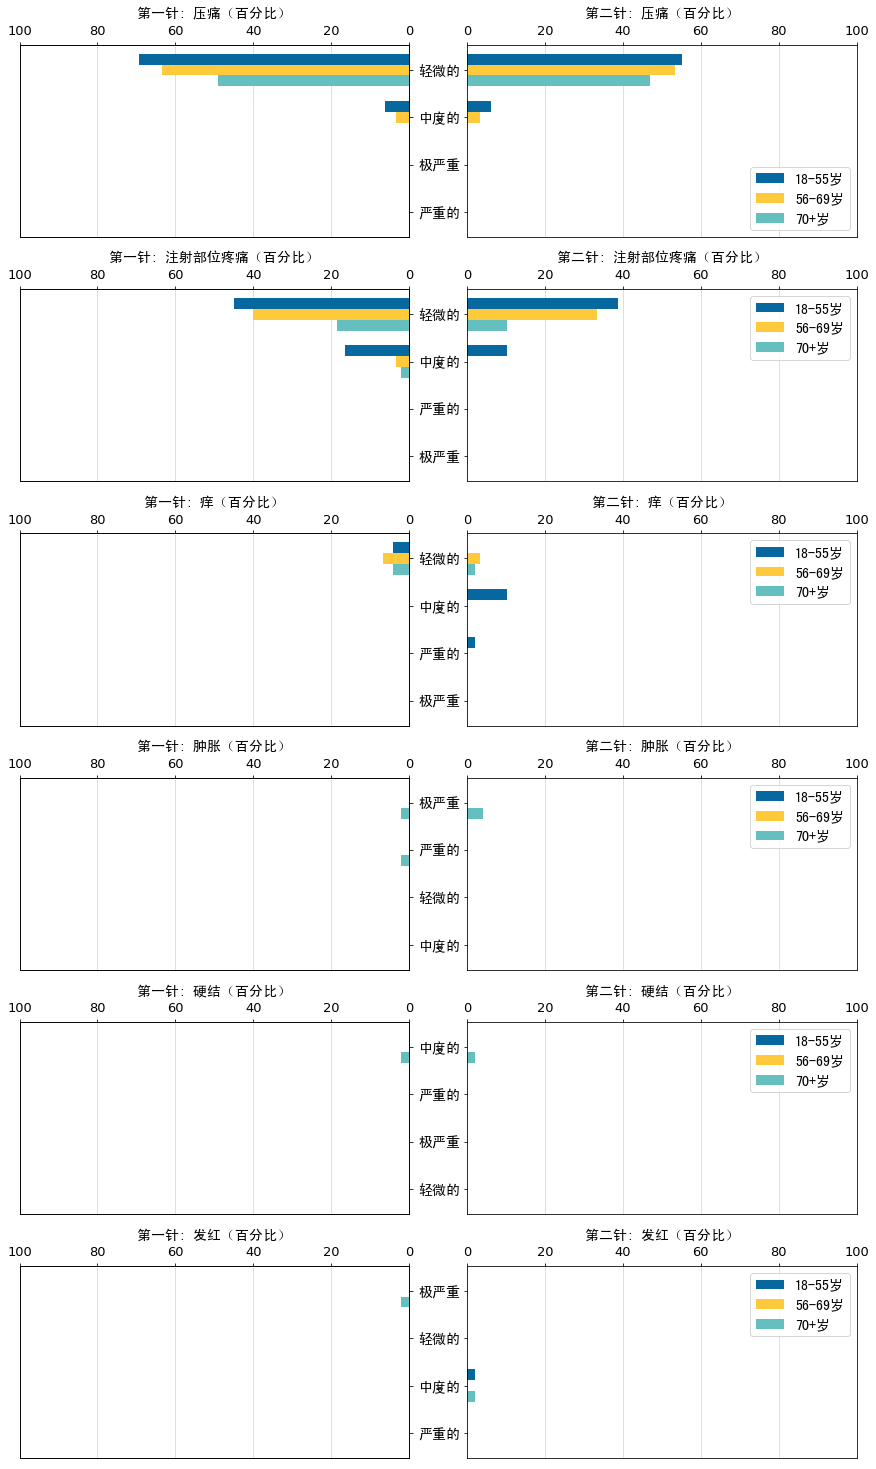

In [5]:
fig, axarr = plt.subplots(nrows=6, ncols=2, figsize=(15, 26))
width3 = 0.23

viz_detail_reactions(axarr_left=axarr[0, 0], axarr_right=axarr[0, 1], df=local_reactions_df,
                     reaction='压痛', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'], loc=4)
viz_detail_reactions(axarr_left=axarr[1, 0], axarr_right=axarr[1, 1], df=local_reactions_df,
                     reaction='注射部位疼痛', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])
viz_detail_reactions(axarr_left=axarr[2, 0], axarr_right=axarr[2, 1], df=local_reactions_df,
                     reaction='痒', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])
viz_detail_reactions(axarr_left=axarr[3, 0], axarr_right=axarr[3, 1], df=local_reactions_df,
                     reaction='肿胀', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])
viz_detail_reactions(axarr_left=axarr[4, 0], axarr_right=axarr[4, 1], df=local_reactions_df,
                     reaction='硬结', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])
viz_detail_reactions(axarr_left=axarr[5, 0], axarr_right=axarr[5, 1], df=local_reactions_df,
                     reaction='发红', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])


plt.subplots_adjust(wspace=0.15, hspace=0.27)

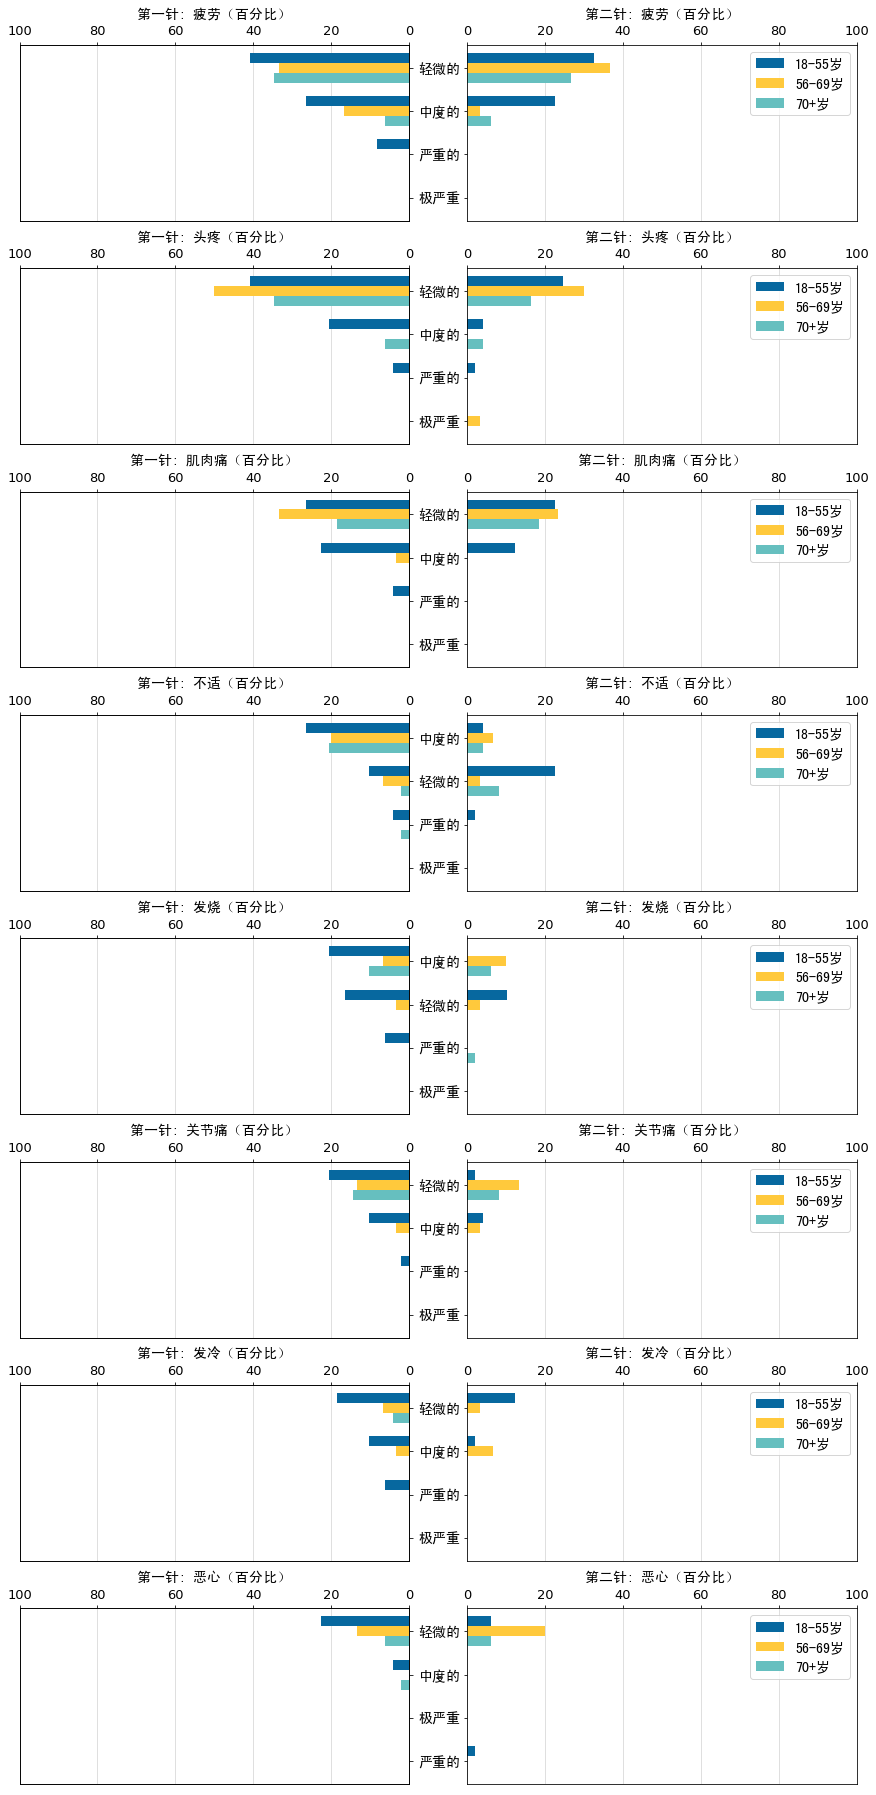

In [6]:
fig, axarr = plt.subplots(nrows=8, ncols=2, figsize=(15, 32))
width3 = 0.23

viz_detail_reactions(axarr_left=axarr[0, 0], axarr_right=axarr[0, 1], df=sys_reactions_df,
                     reaction='疲劳', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])
viz_detail_reactions(axarr_left=axarr[1, 0], axarr_right=axarr[1, 1], df=sys_reactions_df,
                     reaction='头疼', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])
viz_detail_reactions(axarr_left=axarr[2, 0], axarr_right=axarr[2, 1], df=sys_reactions_df,
                     reaction='肌肉痛', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])
viz_detail_reactions(axarr_left=axarr[3, 0], axarr_right=axarr[3, 1], df=sys_reactions_df,
                     reaction='不适', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])
viz_detail_reactions(axarr_left=axarr[4, 0], axarr_right=axarr[4, 1], df=sys_reactions_df,
                     reaction='发烧', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])
viz_detail_reactions(axarr_left=axarr[5, 0], axarr_right=axarr[5, 1], df=sys_reactions_df,
                     reaction='关节痛', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])
viz_detail_reactions(axarr_left=axarr[6, 0], axarr_right=axarr[6, 1], df=sys_reactions_df,
                     reaction='发冷', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])
viz_detail_reactions(axarr_left=axarr[7, 0], axarr_right=axarr[7, 1], df=sys_reactions_df,
                     reaction='恶心', degree_nb=4, width=width3,
                     color_list=['#07689F', '#FFC93C', '#66BFBF'])


plt.subplots_adjust(wspace=0.15, hspace=0.27)